In [1]:
#Analyze data

#Import libraries
import numpy as np
import cv2

#Cargo imagen de ejemplo
file = "example_data/image1.png"
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#Imprimo dimensiones de la imagen, tipo y rangos de valores
print("Dimensiones de la imagen: ", img.shape)
print("Tipo de la imagen: ", img.dtype)
print("Rango de valores de la imagen: ", np.min(img), np.max(img))

#Cargo imagen de ejemplo de pilar
file = "pilar_data/image1.png"

#Cargo imagen de ejemplo
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

#Imprimo dimensiones de la imagen, tipo y rangos de valores
print("Dimensiones de la imagen: ", img.shape)
print("Tipo de la imagen: ", img.dtype)
print("Rango de valores de la imagen: ", np.min(img), np.max(img))





OpenCV bindings requires "numpy" package.
Install it via command:
    pip install numpy


ModuleNotFoundError: No module named 'numpy.core.multiarray'

In [1]:
from choroidalyze import Choroidalyzer

# This initialises choroidalyzer. 
# It will try to automatically download the model weights from github the first time you run it. 
choroidalyzer = Choroidalyzer()


file = 'pilar_data/Example.png'

# basic useage: get the metrics
metrics = choroidalyzer.analyze(file) #, scale=(11.49, 3.87)
print(metrics)

RuntimeError: Given groups=1, weight of size [8, 1, 3, 3], expected input[1, 4, 490, 509] to have 1 channels, but got 4 channels instead

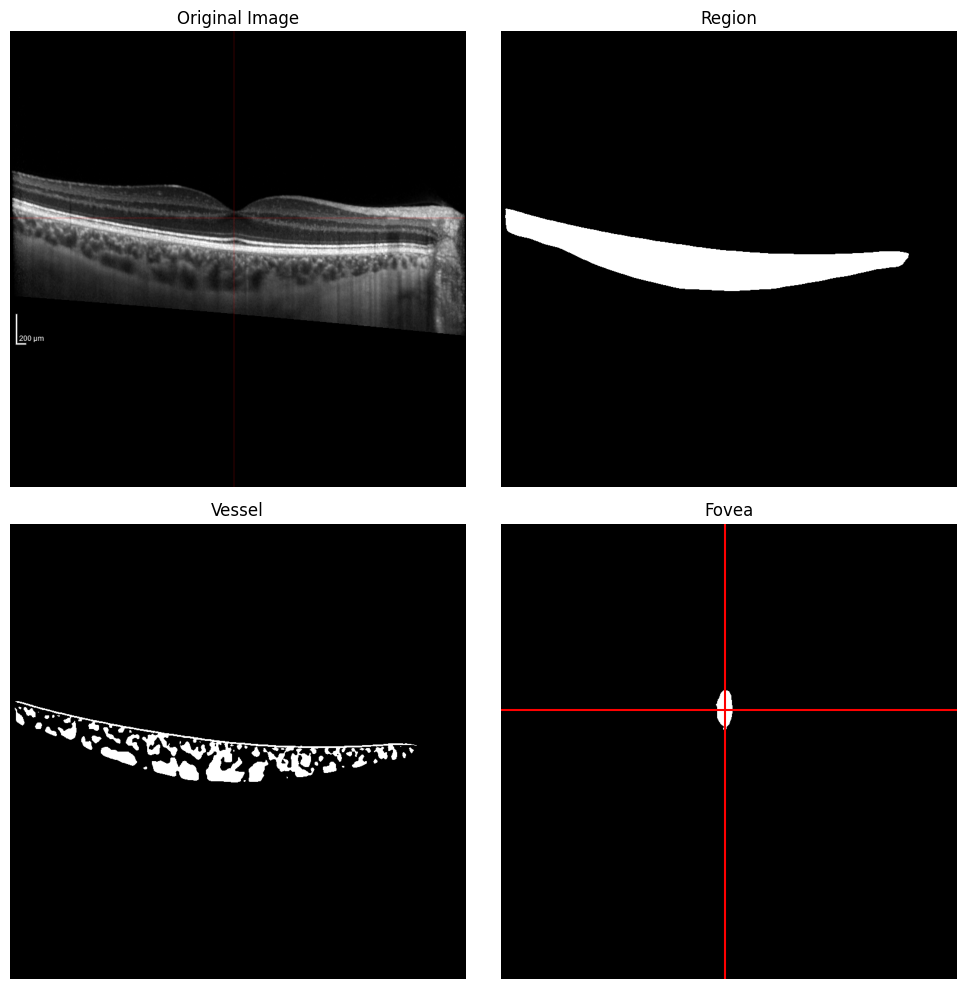

In [13]:
# choroidalyzer also has a basic plotting function to inspect segmentation outputs
choroidalyzer.predict_and_plot(file)

In [16]:
# you can also access just the segmentations
raw_segmentations = choroidalyzer.predict(file)
print('The segmentation has 3 channels: first channel is region, second vessels, third fovea')
print(choroidalyzer.outputs)
print(raw_segmentations.shape)
print('Note that the segmentations by default are not binarized, so you can access the raw pixel-wise probabilities')

The segmentation has 3 channels: first channel is region, second vessels, third fovea
['region', 'vessel', 'fovea']
torch.Size([3, 768, 768])
Note that the segmentations by default are not binarized, so you can access the raw pixel-wise probabilities
